**Задание 1 (продвинутое) Никита Андриянов** 

In [2]:
!pip uninstall -y transformers accelerate
!pip install transformers accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 110.8 MB/s eta 0:00:00


Будем решать задачу классификации и анализа новостной информации

In [3]:
# Данные загружены из https://github.com/natasha/corus#load_lenta, но через репозиторий https://github.com/yutkin
# Датасет Lenta.ru v1.0
# Распокованный размер 1.66 Gb
# Размер текст 739 351

Скачаем датасет с гитхаба

In [4]:
import requests

#url = 'https://github.com/natasha/corus/blob/master/data/lenta-ru-news.csv.gz?raw=true'
url = 'https://github.com/yutkin/Lenta.Ru-News-Dataset/releases/download/v1.0/lenta-ru-news.csv.gz'
r = requests.get(url, allow_redirects=True)
w = open('lenta-ru-news.csv.gz', 'wb').write(r.content)

Распакуем архив и занесем всю информацию в csv файл

In [5]:
import gzip
import shutil

with gzip.open('lenta-ru-news.csv.gz', 'rb') as f_in:
  with open('lenta-ru-news.csv', 'wb') as f_out:
    shutil.copyfileobj(f_in, f_out)

Посмотрим на данные, предварительно увеличив ширину выводимой информации в DataFrame (нам это понадобится для показа текстов статей): 

In [6]:
import pandas as pd
pd.set_option('max_colwidth',600)

df = pd.read_csv('lenta-ru-news.csv')
df.head()

,url,title,text,topic,tags
0,https://lenta.ru/news/2018/12/14/cancer/,Названы регионы России с самой высокой смертностью от рака,"Вице-премьер по социальным вопросам Татьяна Голикова рассказала, в каких регионах России зафиксирована наиболее высокая смертность от рака, сообщает РИА Новости. По словам Голиковой, чаще всего онкологические заболевания становились причиной смерти в Псковской, Тверской, Тульской и Орловской областях, а также в Севастополе. Вице-премьер напомнила, что главные факторы смертности в России — рак и болезни системы кровообращения. В начале года стало известно, что смертность от онкологических заболеваний среди россиян снизилась впервые за три года. По данным Росстата, в 2017 году от рака умерли...",Россия,Общество
1,https://lenta.ru/news/2018/12/15/doping/,Австрия не представила доказательств вины российских биатлонистов,"Австрийские правоохранительные органы не представили доказательств нарушения российскими биатлонистами антидопинговых правил. Об этом сообщил посол России в Вене Дмитрий Любинский по итогам встречи уполномоченного адвоката дипмиссии с представителями прокуратуры страны, передает ТАСС. «Действует презумпция невиновности. Каких-либо ограничений свободы передвижения для команды нет», — добавили в посольстве. Международный союз биатлонистов (IBU) также не будет применять санкции к российским биатлонистам. Все они продолжат выступление на Кубке мира. Полиция нагрянула в отель сборной России в Х...",Спорт,Зимние виды
2,https://lenta.ru/news/2018/12/15/disneyland/,Обнаружено самое счастливое место на планете,"Сотрудники социальной сети Instagram проанализировали поставленные пользователями смайлики, геолокации и хештеги и опубликовали итоги 2018 года. Об этом сообщается на официальном сайте Instagram. Таким образом, самой счастливой геолокацией Instagram признал Диснейленд в Токио, так как больше всего счастливых смайликов в 2018 году пользователи ставили именно под фотографиями из японского Диснейленда. Также эксперты назвали самый популярный фильтр для лица: им стал фильтр с сердечками на глазах. А, например, самыми часто используемыми хештегами в 2018 году были #metoo, #timesup и #marchforou...",Путешествия,Мир
3,https://lenta.ru/news/2018/12/15/usa25/,В США раскрыли сумму расходов на расследование «российского дела»,"С начала расследования российского вмешательства в выборы власти США потратили более 25 миллионов долларов. Об этом сообщает Associated Press со ссылкой на отчет Министерства юстиции США. В документе содержатся данные о расходах на следствие с апреля по сентябрь 2018 года. За эти полгода было потрачено 4,6 миллиона долларов, из которых почти 3 миллиона долларов ушли на зарплату сотрудников, 580 тысяч — на поездки и сопутствующие расходы. Ранее Минюст США уже публиковал отчеты о затратах на дело о российском вмешательстве за предыдущие месяцы. 11 декабря расследование спецпрокурора Робера М...",Мир,Политика
4,https://lenta.ru/news/2018/12/15/integrity/,Хакеры рассказали о планах Великобритании заминировать Севастополь,"Хакерская группировка Anonymous опубликовала новые документы о деятельности британского аналитического центра Integrity Initiative. Из материалов следует, что центр получает финансирование от некого Института государственного управления под руководством Кристофера Доннелли. Хакеры выложили в открытый доступ его паспорт, резюме, а также сведения о его связях с Министерством обороны Великобритании. Согласно документам, в 2014 году Доннелли выдвинул ряд предложений британским властям в связи с ситуацией в Крыму. В частности, он планировал заминировать Севастопольскую бухту, окружить полуостро...",Мир,Общество


Проверим таблицу на наличие пустых данных

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739351 entries, 0 to 739350
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     739351 non-null  object
 1   title   739351 non-null  object
 2   text    739346 non-null  object
 3   topic   739148 non-null  object
 4   tags    712837 non-null  object
dtypes: object(5)
memory usage: 28.2+ MB


Не все поля таблицы заполнены, но с учетом размера данных выберем такие, где значение параметра tags, text и topic не пустое

In [8]:
#df_full = df[(df['text'].isnull()==False)&(df['topic'].isnull()==False)&(df['tags'].isnull()==False)]
df_full = df.dropna()

In [9]:
df_full

,url,title,text,topic,tags
0,https://lenta.ru/news/2018/12/14/cancer/,Названы регионы России с самой высокой смертностью от рака,"Вице-премьер по социальным вопросам Татьяна Голикова рассказала, в каких регионах России зафиксирована наиболее высокая смертность от рака, сообщает РИА Новости. По словам Голиковой, чаще всего онкологические заболевания становились причиной смерти в Псковской, Тверской, Тульской и Орловской областях, а также в Севастополе. Вице-премьер напомнила, что главные факторы смертности в России — рак и болезни системы кровообращения. В начале года стало известно, что смертность от онкологических заболеваний среди россиян снизилась впервые за три года. По данным Росстата, в 2017 году от рака умерли...",Россия,Общество
1,https://lenta.ru/news/2018/12/15/doping/,Австрия не представила доказательств вины российских биатлонистов,"Австрийские правоохранительные органы не представили доказательств нарушения российскими биатлонистами антидопинговых правил. Об этом сообщил посол России в Вене Дмитрий Любинский по итогам встречи уполномоченного адвоката дипмиссии с представителями прокуратуры страны, передает ТАСС. «Действует презумпция невиновности. Каких-либо ограничений свободы передвижения для команды нет», — добавили в посольстве. Международный союз биатлонистов (IBU) также не будет применять санкции к российским биатлонистам. Все они продолжат выступление на Кубке мира. Полиция нагрянула в отель сборной России в Х...",Спорт,Зимние виды
2,https://lenta.ru/news/2018/12/15/disneyland/,Обнаружено самое счастливое место на планете,"Сотрудники социальной сети Instagram проанализировали поставленные пользователями смайлики, геолокации и хештеги и опубликовали итоги 2018 года. Об этом сообщается на официальном сайте Instagram. Таким образом, самой счастливой геолокацией Instagram признал Диснейленд в Токио, так как больше всего счастливых смайликов в 2018 году пользователи ставили именно под фотографиями из японского Диснейленда. Также эксперты назвали самый популярный фильтр для лица: им стал фильтр с сердечками на глазах. А, например, самыми часто используемыми хештегами в 2018 году были #metoo, #timesup и #marchforou...",Путешествия,Мир
3,https://lenta.ru/news/2018/12/15/usa25/,В США раскрыли сумму расходов на расследование «российского дела»,"С начала расследования российского вмешательства в выборы власти США потратили более 25 миллионов долларов. Об этом сообщает Associated Press со ссылкой на отчет Министерства юстиции США. В документе содержатся данные о расходах на следствие с апреля по сентябрь 2018 года. За эти полгода было потрачено 4,6 миллиона долларов, из которых почти 3 миллиона долларов ушли на зарплату сотрудников, 580 тысяч — на поездки и сопутствующие расходы. Ранее Минюст США уже публиковал отчеты о затратах на дело о российском вмешательстве за предыдущие месяцы. 11 декабря расследование спецпрокурора Робера М...",Мир,Политика
4,https://lenta.ru/news/2018/12/15/integrity/,Хакеры рассказали о планах Великобритании заминировать Севастополь,"Хакерская группировка Anonymous опубликовала новые документы о деятельности британского аналитического центра Integrity Initiative. Из материалов следует, что центр получает финансирование от некого Института государственного управления под руководством Кристофера Доннелли. Хакеры выложили в открытый доступ его паспорт, резюме, а также сведения о его связях с Министерством обороны Великобритании. Согласно документам, в 2014 году Доннелли выдвинул ряд предложений британским властям в связи с ситуацией в Крыму. В частности, он планировал заминировать Севастопольскую бухту, окружить полуостро...",Мир,Общество
...,...,...,...,...,...
739346,https://lenta.ru/news/1999/08/31/cholera/,Южно-Сахалинск объявлен очагом холеры,"Сегодня областной центр Сахалина и Курил получил статус очага распространения холеры. Как сообщает ИТАР-ТАСС со ссылкой на пресс-центр администрации Сахалинской области, в лечебных учреждениях Южно-Сахалинска уже находятсятся 5 горожан, причем у двоих

Убедимся, что данные без пропусков

In [10]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712829 entries, 0 to 739350
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     712829 non-null  object
 1   title   712829 non-null  object
 2   text    712829 non-null  object
 3   topic   712829 non-null  object
 4   tags    712829 non-null  object
dtypes: object(5)
memory usage: 32.6+ MB


Видим, что помимо полных текстовых описаний в таблице присутствуют столбцы topic и tags. Для классификации выберем тот, в котором меньше уникальных значений.

In [11]:
topics = set(df_full['topic'])
tags = set(df_full['tags'])
print('Topics:', topics, len(topics))
print('Tags:', tags, len(tags))

Topics: {'Силовые структуры', '69-я параллель', 'Библиотека', 'Бизнес', 'Культура', 'Интернет и СМИ', 'МедНовости', 'Дом', 'Россия', 'Легпром', 'Экономика', 'Путешествия', 'ЧМ-2014', 'Сочи', 'Наука и техника', 'Бывший СССР', 'Крым', 'Оружие', 'Культпросвет ', 'Мир', 'Из жизни', 'Спорт', 'Ценности'} 23
Tags: {'Вооружение', 'Вещи', 'Выборы', 'ТВ и радио', 'Игры', 'Преступная Россия', 'Белоруссия', 'Город', 'Мировой опыт', 'Первая мировая', 'Деньги', 'Социальная сфера', 'Мемы', 'Криминал', 'Софт', 'Закавказье', 'Футбол', 'Производители', 'Дача', 'Часы', 'Прибалтика', 'Кино', 'Наследие', 'Вирусные ролики', 'Следствие и суд', 'Техника', 'Фотография', 'Стиль', 'Конфликты', 'Хоккей', 'Офис', 'Квартира', 'Инновации', 'Политика', 'Общество', 'Звери', 'Оружие', 'Наука', 'События', 'Искусство', 'Жизнь', 'Интернет', 'Молдавия', 'Полиция и спецслужбы', 'Книги', 'Достижения', 'Зимние виды', 'Страноведение', 'Мнения', 'Авто', 'Космос', 'Средняя Азия', 'Инструменты', 'Рынки', 'Финансы компаний', 'Росс

Таким образом, классификация возможна по 23 темам. Тэгов слишком много - 88. В итоговый датасет попало более, чем 712 тысяч строк, поэтому сократим его в 20 раз с целью оптимизации процессов анализа и обучения модели.

In [12]:
df_cut = df_full.sample(frac=0.005, random_state=1) # датасет большой, поэтому берем треть, оставим всегда одинаковые результаты
df_cut.reset_index(inplace=True, drop=True)
df_text = df_cut['text'].tolist()
df_topic = df_cut['topic'].tolist()
topic_cnt = len(set(df_topic))
print(f'Количество тем для классификации после обрезки: {topic_cnt}')
df_cut.head()

Количество тем для классификации после обрезки: 18


,url,title,text,topic,tags
0,https://lenta.ru/news/2011/02/04/developing/,Развивающиеся страны потеряли 4 миллиарда долларов инвестиций за неделю,"Инвесторы на неделе с 26 января по 2 февраля резко сократили свои вложения в акции развивающихся рынков, сообщает Reuters. Чистый отток капитала из соответствующих фондов составил 4,1 миллиарда долларов. Одной из ключевых причин вывода средств стали беспорядки в Египте, грозящие усилением политической нестабильности в развивающихся странах. Значительная часть этих средств была переведена в ценные бумаги США, чему способствовала хорошая макроэкономическая статистика. В частности, вышли убедительные данные по росту ВВП в четвертом квартале (рост на 2,9 процента в годовом исчислении), а также...",Экономика,Все
1,https://lenta.ru/news/2016/08/12/funeral/,Брат и сестра погибли в Кировской области по пути на похороны матери,"В Кировской области брат и сестра, ехавшие на похороны матери, погибли в ДТП, сообщает в пятницу, 12 августа, портал Progorod43.ru. Авария произошла накануне утром на трассе в Омутнинском районе области. Находившийся за рулем автомобиля ВАЗ 69-летний мужчина не справился с управлением, из-за чего машина съехала в кювет и перевернулась. В результате ДТП погибли водитель и 59-летняя пассажирка. Отмечается, что они ехали на церемонию прощания с 91-летней матерью, проходившую в деревне Челка в Советском районе. Ранее в августе в Астрахани автобус, водитель которого потерял сознание во время е...",Россия,Происшествия
2,https://lenta.ru/news/2006/11/21/kaladze/,"Защитник ""Милана"" будет рекламировать грузинское вино","Защитник сборной Грузии и итальянского ""Милана"" Каха Каладзе решил рекламировать и продавать грузинские вина в знаменитом миланском ресторане ""Джанино"". В июне футболист вместе со своими друзьями выкупил и отреставрировал это заведение и теперь собирается добавить в меню свои национальные вина. ""В нашем ресторане бывают известные лица Италии: спортсмены, бизнесмены, журналисты, актеры, модели. Пока мы продаем итальянские вина. Скоро в ресторане появятся грузинские вина, мы будем их рекламировать и продавать"", - рассказал Каладзе. Как отмечает интернет-издание korrespondent.net, пока неизв...",Спорт,Все
3,https://lenta.ru/news/2004/05/14/artifacts/,Шведский археолог просит снять с аукционов ножи викингов,"Археолог Кристиан Рюнебю (Christian Runeby) просит правительство Швеции вернуть в страну оружие викингов, которое оказалось в распоряжении аукциона Faganarms в штате Мичиган, сообщает АР. Рюнебю обнаружил на сайте этого аукциона, который специализируется на старинном оружии, выставленные мечи, ножи, браслеты и конскую сбрую. Большинство артефактов датируется примерно 800 годом нашей эры. Общая стоимость коллекции из сотни предметов оценивается администрацией Faganarms в 26 тысяч долларов. На сайте указано, что все это было найдено на раскопках одного поселения викингов на острове Готланд...",Мир,Все
4,https://lenta.ru/news/2005/05/23/elections/,Аббаса просят отложить парламентские выборы,"В понедельник палестинский избирком объявил, что не успеет подготовиться к проведению парламентских выборов, намеченных на 17 июля. Как сообщает агентство Associated Press, в связи с этим председателя палестинской автономии Махмуда Аббаса попросили назначить специальным указом новую дату выборов. Комиссия утверждает, что ей потребуется не менее двух месяцев с момента принятия закона о выборах, чтобы подготовиться к их проведению. Однако принятие выборного законодательства откладывается из-за разногласий между Аббасом и парламентом, которые никак не могут договориться, сколько депутатов дол...",Мир,Все


Оставим только поля title, text, topic. Но добавим поле full description, которое будет содержать и текст и заголовок статьи. Потом можно попробовать реализовать 3 модели.

In [13]:
df_cut = df_cut[['title', 'text', 'topic']]
df_cut.insert(2, 'full_description', pd.Series([i for i in range(len(df_cut))]))
df_cut['full_description'] = df_cut['title'] + "." + df_cut['text']
df_text = df_cut['text'].tolist()
df_title = df_cut['title'].tolist()
df_fulltext = df_cut['full_description'].to_list()
df_cut.head()

,title,text,full_description,topic
0,Развивающиеся страны потеряли 4 миллиарда долларов инвестиций за неделю,"Инвесторы на неделе с 26 января по 2 февраля резко сократили свои вложения в акции развивающихся рынков, сообщает Reuters. Чистый отток капитала из соответствующих фондов составил 4,1 миллиарда долларов. Одной из ключевых причин вывода средств стали беспорядки в Египте, грозящие усилением политической нестабильности в развивающихся странах. Значительная часть этих средств была переведена в ценные бумаги США, чему способствовала хорошая макроэкономическая статистика. В частности, вышли убедительные данные по росту ВВП в четвертом квартале (рост на 2,9 процента в годовом исчислении), а также...","Развивающиеся страны потеряли 4 миллиарда долларов инвестиций за неделю.Инвесторы на неделе с 26 января по 2 февраля резко сократили свои вложения в акции развивающихся рынков, сообщает Reuters. Чистый отток капитала из соответствующих фондов составил 4,1 миллиарда долларов. Одной из ключевых причин вывода средств стали беспорядки в Египте, грозящие усилением политической нестабильности в развивающихся странах. Значительная часть этих средств была переведена в ценные бумаги США, чему способствовала хорошая макроэкономическая статистика. В частности, вышли убедительные данные по росту ВВП в...",Экономика
1,Брат и сестра погибли в Кировской области по пути на похороны матери,"В Кировской области брат и сестра, ехавшие на похороны матери, погибли в ДТП, сообщает в пятницу, 12 августа, портал Progorod43.ru. Авария произошла накануне утром на трассе в Омутнинском районе области. Находившийся за рулем автомобиля ВАЗ 69-летний мужчина не справился с управлением, из-за чего машина съехала в кювет и перевернулась. В результате ДТП погибли водитель и 59-летняя пассажирка. Отмечается, что они ехали на церемонию прощания с 91-летней матерью, проходившую в деревне Челка в Советском районе. Ранее в августе в Астрахани автобус, водитель которого потерял сознание во время е...","Брат и сестра погибли в Кировской области по пути на похороны матери.В Кировской области брат и сестра, ехавшие на похороны матери, погибли в ДТП, сообщает в пятницу, 12 августа, портал Progorod43.ru. Авария произошла накануне утром на трассе в Омутнинском районе области. Находившийся за рулем автомобиля ВАЗ 69-летний мужчина не справился с управлением, из-за чего машина съехала в кювет и перевернулась. В результате ДТП погибли водитель и 59-летняя пассажирка. Отмечается, что они ехали на церемонию прощания с 91-летней матерью, проходившую в деревне Челка в Советском районе. Ранее в авгус...",Россия
2,"Защитник ""Милана"" будет рекламировать грузинское вино","Защитник сборной Грузии и итальянского ""Милана"" Каха Каладзе решил рекламировать и продавать грузинские вина в знаменитом миланском ресторане ""Джанино"". В июне футболист вместе со своими друзьями выкупил и отреставрировал это заведение и теперь собирается добавить в меню свои национальные вина. ""В нашем ресторане бывают известные лица Италии: спортсмены, бизнесмены, журналисты, актеры, модели. Пока мы продаем итальянские вина. Скоро в ресторане появятся грузинские вина, мы будем их рекламировать и продавать"", - рассказал Каладзе. Как отмечает интернет-издание korrespondent.net, пока неизв...","Защитник ""Милана"" будет рекламировать грузинское вино.Защитник сборной Грузии и итальянского ""Милана"" Каха Каладзе решил рекламировать и продавать грузинские вина в знаменитом миланском ресторане ""Джанино"". В июне футболист вместе со своими друзьями выкупил и отреставрировал это заведение и теперь собирается добавить в меню свои национальные вина. ""В нашем ресторане бывают известные лица Италии: спортсмены, бизнесмены, журналисты, актеры, модели. Пока мы продаем итальянские вина. Скоро в ресторане появятся грузинские вина, мы будем их рекламировать и продавать"", - рассказал Каладзе. Как от...",Спорт
3,Шведский археолог просит снять с аукционов ножи викингов,"Археолог Кристиан Рюнебю (Christian Runeby) просит пра

Проверим, что тексты чистые. Выведем несколько примеров из начала, середины и конца таблицы

In [14]:
print('Начало')
for t in df_cut['text'][:10]:
  print(t)
  print('*'*100)
print('Середина')
for t in df_cut['text'][len(df_cut)//2:len(df_cut)//2+10]:
  print(t)
  print('*'*100)
print('Конец')
for t in df_cut['text'][-10:]:
  print(t)
  print('*'*100)

Начало
Инвесторы на неделе с 26 января по 2 февраля резко сократили свои вложения в акции развивающихся рынков, сообщает Reuters. Чистый отток капитала из соответствующих фондов составил 4,1 миллиарда долларов. Одной из ключевых причин вывода средств стали беспорядки в Египте, грозящие усилением политической нестабильности в развивающихся странах. Значительная часть этих средств была переведена в ценные бумаги США, чему способствовала хорошая макроэкономическая статистика. В частности, вышли убедительные данные по росту ВВП в четвертом квартале (рост на 2,9 процента в годовом исчислении), а также по промышленному производству в январе. Наибольший урон понесли фонды Китая и Индии, отток средств из которых превысил 800 миллионов долларов. Напротив, Восточная Европа и России столкнулись с проблемой бегства капиталов в значительно меньшей степени. Как отмечают "Ведомости", сравнительно неплохие показатели России могут быть обусловлены интересом инвесторов к РФ как к альтернативному поставщ

**Распределение по классам**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Россия'),
  Text(1, 0, 'Мир'),
  Text(2, 0, 'Экономика'),
  Text(3, 0, 'Бывший СССР'),
  Text(4, 0, 'Наука и техника'),
  Text(5, 0, 'Культура'),
  Text(6, 0, 'Спорт'),
  Text(7, 0, 'Интернет и СМИ'),
  Text(8, 0, 'Из жизни'),
  Text(9, 0, 'Дом'),
  Text(10, 0, 'Силовые структуры'),
  Text(11, 0, 'Бизнес'),
  Text(12, 0, 'Ценности'),
  Text(13, 0, 'Путешествия'),
  Text(14, 0, 'Крым'),
  Text(15, 0, '69-я параллель'),
  Text(16, 0, 'Библиотека'),
  Text(17, 0, 'Культпросвет ')])

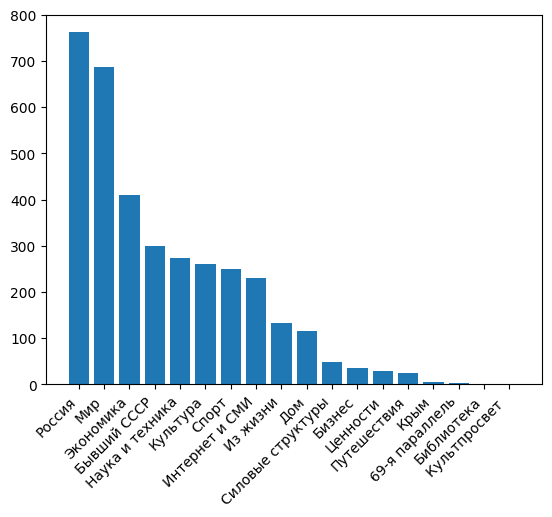

In [15]:
import matplotlib.pyplot as plt
class_distrib = df_cut.groupby('topic').size().sort_values()
plt.bar(class_distrib[::-1].index,class_distrib[::-1])
plt.xticks(rotation=45, ha='right')

Видим, что датасет сильно не сбалансирован. Поэтому интересно смотреть метрики precision и recall, а не только accuracy при классификации.

<b>Предобработка текста</b>

Естественно, просто так начать работу с текстами не выйдет, поэтому необходимо:
1. Токенизировать тексты
2. Убрать стоп-слова и пунктуацию
3. Лемматизировать токены

In [16]:
!pip install pymorphy2
!pip install -U pymorphy2-dicts-ru

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 74.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=1d671397214823f9405f225cc12e30c116c94e81cb8ea5cb22cd3deb81a845f1
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
from functools import lru_cache
from tqdm import tqdm  
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize # выполняется очень долго, лучше использовать regex
from pymorphy2 import MorphAnalyzer

morph = MorphAnalyzer(lang='ru') # для лемматизации
stop_words = stopwords.words('russian') # стоп слова
stop_words.extend(['быть', 'что', 'это', 'так', 'вот', 'как', 'к', 'в', 'на', '...', '—', '–', '-']) #дополним список стоп-слов

def word_tokenize(text): # оптимизируем, используя regex вместо nltk.tokenize
  text = text.lower() # весь текст строчными буквами
  text = re.sub(r'[^a-zA-Zа-яА-Я —–-]', '', str(text)) # выделяем только слова, в том числе с тире
  words = text.split() # делим на слова весь фильтрованный текст
  return words

@lru_cache(maxsize=None) # оптимизируем, неограничено сохраняя в кэш значения функции
def word_lemmatize(word):
  word = morph.parse(word)[0].normal_form # начальная форма с лучшим совпадением (score)
  return word

def process_text(text):
  text_result = () # оптимизируем, используя кортеж
  for article in tqdm(text):
    tokens = word_tokenize(article) # токенизируем тексты
    tokens = filter(lambda word: word not in stop_words, tokens) # фильтруем стопслова
    lemmas = tuple(word_lemmatize(word) for word in tokens) # лемматизируем
    text_result += (lemmas,) # оптимизируем, используя кортеж
  return text_result

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
text_lemmatized = process_text(df_text) # с помощью оптимизации обработка сократилась

100%|██████████| 3564/3564 [00:30<00:00, 115.16it/s]


In [19]:
title_lemmatized = process_text(df_title)

100%|██████████| 3564/3564 [00:02<00:00, 1561.51it/s]


In [20]:
fulltext_lemmatized = process_text(df_fulltext)

100%|██████████| 3564/3564 [00:04<00:00, 733.21it/s]


Выведем некоторые примеры лемматизации

In [21]:
text_lemmatized[:10]

(('инвестор',
  'неделя',
  'январь',
  'февраль',
  'резко',
  'сократить',
  'свой',
  'вложение',
  'акция',
  'развивающийся',
  'рынок',
  'сообщать',
  'reuters',
  'чистый',
  'отток',
  'капитал',
  'соответствующий',
  'фонд',
  'составить',
  'миллиард',
  'доллар',
  'один',
  'ключевой',
  'причина',
  'вывод',
  'средство',
  'стать',
  'беспорядок',
  'египет',
  'грозить',
  'усиление',
  'политический',
  'нестабильность',
  'развивающийся',
  'страна',
  'значительный',
  'часть',
  'этот',
  'средство',
  'перевести',
  'ценный',
  'бумага',
  'сша',
  'что',
  'способствовать',
  'хороший',
  'макроэкономический',
  'статистика',
  'частность',
  'выйти',
  'убедительный',
  'дать',
  'рост',
  'ввп',
  'четвёртый',
  'квартал',
  'рост',
  'процент',
  'годовой',
  'исчисление',
  'также',
  'промышленный',
  'производство',
  'январь',
  'больший',
  'урон',
  'понести',
  'фонд',
  'китай',
  'индия',
  'отток',
  'средство',
  'который',
  'превысить',
  'миллион

Создадим новые столбцы в датафрейме с лемматизацией

In [22]:
df_cut['text_lemm'] = text_lemmatized
df_cut['title_lemm'] = title_lemmatized
df_cut['full_lemm'] = fulltext_lemmatized
df_cut.head()

,title,text,full_description,topic,text_lemm,title_lemm,full_lemm
0,Развивающиеся страны потеряли 4 миллиарда долларов инвестиций за неделю,"Инвесторы на неделе с 26 января по 2 февраля резко сократили свои вложения в акции развивающихся рынков, сообщает Reuters. Чистый отток капитала из соответствующих фондов составил 4,1 миллиарда долларов. Одной из ключевых причин вывода средств стали беспорядки в Египте, грозящие усилением политической нестабильности в развивающихся странах. Значительная часть этих средств была переведена в ценные бумаги США, чему способствовала хорошая макроэкономическая статистика. В частности, вышли убедительные данные по росту ВВП в четвертом квартале (рост на 2,9 процента в годовом исчислении), а также...","Развивающиеся страны потеряли 4 миллиарда долларов инвестиций за неделю.Инвесторы на неделе с 26 января по 2 февраля резко сократили свои вложения в акции развивающихся рынков, сообщает Reuters. Чистый отток капитала из соответствующих фондов составил 4,1 миллиарда долларов. Одной из ключевых причин вывода средств стали беспорядки в Египте, грозящие усилением политической нестабильности в развивающихся странах. Значительная часть этих средств была переведена в ценные бумаги США, чему способствовала хорошая макроэкономическая статистика. В частности, вышли убедительные данные по росту ВВП в...",Экономика,"(инвестор, неделя, январь, февраль, резко, сократить, свой, вложение, акция, развивающийся, рынок, сообщать, reuters, чистый, отток, капитал, соответствующий, фонд, составить, миллиард, доллар, один, ключевой, причина, вывод, средство, стать, беспорядок, египет, грозить, усиление, политический, нестабильность, развивающийся, страна, значительный, часть, этот, средство, перевести, ценный, бумага, сша, что, способствовать, хороший, макроэкономический, статистика, частность, выйти, убедительный, дать, рост, ввп, четвёртый, квартал, рост, процент, годовой, исчисление, также, промышленный, прои...","(развивающийся, страна, потерять, миллиард, доллар, инвестиция, занеделя)","(развивающийся, страна, потерять, миллиард, доллар, инвестиция, занеделюинвестор, неделя, январь, февраль, резко, сократить, свой, вложение, акция, развивающийся, рынок, сообщать, reuters, чистый, отток, капитал, соответствующий, фонд, составить, миллиард, доллар, один, ключевой, причина, вывод, средство, стать, беспорядок, египет, грозить, усиление, политический, нестабильность, развивающийся, страна, значительный, часть, этот, средство, перевести, ценный, бумага, сша, что, способствовать, хороший, макроэкономический, статистика, частность, выйти, убедительный, дать, рост, ввп, четвёртый,..."
1,Брат и сестра погибли в Кировской области по пути на похороны матери,"В Кировской области брат и сестра, ехавшие на похороны матери, погибли в ДТП, сообщает в пятницу, 12 августа, портал Progorod43.ru. Авария произошла накануне утром на трассе в Омутнинском районе области. Находившийся за рулем автомобиля ВАЗ 69-летний мужчина не справился с управлением, из-за чего машина съехала в кювет и перевернулась. В результате ДТП погибли водитель и 59-летняя пассажирка. Отмечается, что они ехали на церемонию прощания с 91-летней матерью, проходившую в деревне Челка в Советском районе. Ранее в августе в Астрахани автобус, водитель которого потерял сознание во время е...","Брат и сестра погибли в Кировской области по пути на похороны матери.В Кировской области брат и сестра, ехавшие на похороны матери, погибли в ДТП, сообщает в пятницу, 12 августа, портал Progorod43.ru. Авария произошла накануне утром на трассе в Омутнинском районе области. Находившийся за рулем автомобиля ВАЗ 69-летний мужчина не справился с управлением, из-за чего машина съехала в кювет и перевернулась. В результате ДТП погибли водитель и 59-летняя пассажирка. Отмечается, что они ехали на церемонию прощания с 91-летней матерью, проходившую в деревне Челка в Советском районе. Ранее в авгус...",Россия,"(кировский, область, брат, сестра, ехать, похороны, мать, погибнуть, дтп, сообщать, п

**Облако слов**

Построим облако слов для каждого класса

In [23]:
text_by_cls = {}
for k in df_cut.topic.value_counts().index:
  text_by_cls[k] = ''
  temp_df = df_cut[df_cut['topic'] == k].full_lemm
  for i in temp_df:
    for j in i:
      text_by_cls[k] += j + ' '
text_by_cls['Россия']

'брат исестра погибнуть вкировский область попуть напохороны материть кировский область брат сестра ехать похороны мать погибнуть дтп сообщать пятница август портал progorodru авария произойти накануне утром трасса омутнинский район область находиться руль автомобиль ваз -летний мужчина справиться управление из-за машина съехать кювета перевернуться результат дтп погибнуть водитель -летний пассажирка отмечаться ехать церемония прощание -летний мать проходить деревня чёлка советский район ранее август астрахань автобус водитель который потерять сознание время езда протаранить несколько автомобиль сбить два пешеход пострадать госпитализировать различный травма находиться руль мужчина скончаться фестиваль нашествие иавиавыставка добавить хлопоты автолюбитель август некоторый район подмосковье связь проведение рок-фестиваль нашествие ограничить движение автотранспорт сообщать риа новость слово представитель гаи московский область затруднение движение возможный деревня клишнева раменский ра

In [24]:
text_by_cls['Спорт']

'защитник милан рекламировать грузинский винозащитник сборная грузия итальянский милан каха каладзе решить рекламировать продавать грузинский вино знаменитый миланский ресторан джанин июнь футболист вместе свой друг выкупить отреставрировать заведение собираться добавить меню свой национальный вино наш ресторан бывать известный лицо италия спортсмен бизнесмен журналист актёр модель пока продавать итальянский вино скоро ресторан появиться грузинский вино быть рекламировать продавать рассказать каладзе отмечать интернет-издание korrespondentnet пока неизвестно какой именно грузинский вино быть рекламироваться продаваться джанин представитель ведущий грузинский производитель вино также пока оглашать дать каха каладзе играть милан год перебраться италия киевский динамо минувший лето защитник являться также капитан сборная грузия подписать клуб новый контракт конец июнь год футболист неоднократно заявлять хотеть остаться жить италия окончание спортивный карьера франция отказаться выдать виз

In [25]:
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [26]:
#чтобы не срабатывали предупреждения
import warnings
warnings.filterwarnings("ignore")

In [27]:
#скачаем маску изображения облака для заполнения словами
import requests
img_url = 'https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1vBeHU3X9Mx2Q4PRRLqbbcTv76OAwQr_W'
img_name = 'cloud'
img_path = img_name +'.png'
img_data = requests.get(img_url).content
with open(img_path, 'wb') as handler:
  handler.write(img_data)

In [28]:
#преобразуем маску изображения в двумерный массив numpy
cloud_mask = {}
for k in text_by_cls.keys():
  cloud_mask[k] = np.array(Image.open(img_path))
  if len(cloud_mask[k].shape) == 3:
    cloud_mask[k] = cloud_mask[k][:,:,0]

In [29]:
#создадим функцию для инвертирования объекта в контейнер для облака слов
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [30]:
#выполним преобразование всех масок в соответствии с описанной выше функцией
transformed_cloud_mask = {}
for k in cloud_mask.keys():
  transformed_cloud_mask[k] = np.ndarray((cloud_mask[k].shape[0],cloud_mask[k].shape[1]), np.int32)
  for i in range(len(cloud_mask[k])):
    transformed_cloud_mask[k][i] = list(map(transform_format, cloud_mask[k][i]))

In [31]:
#обработаем текст и выведем его в соответствии с маской
for k in cloud_mask.keys():
  #print(k)
  wc = WordCloud(max_words=40, mask=transformed_cloud_mask[k], contour_width=0.5, background_color="white", contour_color='black')
# генерируем облако слов
  wc.generate(text_by_cls[k])
# сохраняем его в файл
  wc.to_file("word-cloud_"+str(k)+".png")
# визуализация
  #plt.figure(figsize=[20,10])
  #plt.imshow(wc, interpolation='bilinear')
  #plt.axis("off")
  #print('*'*20)
#plt.show()

Проверим на категориях "Россия" и "Спорт"

Россия


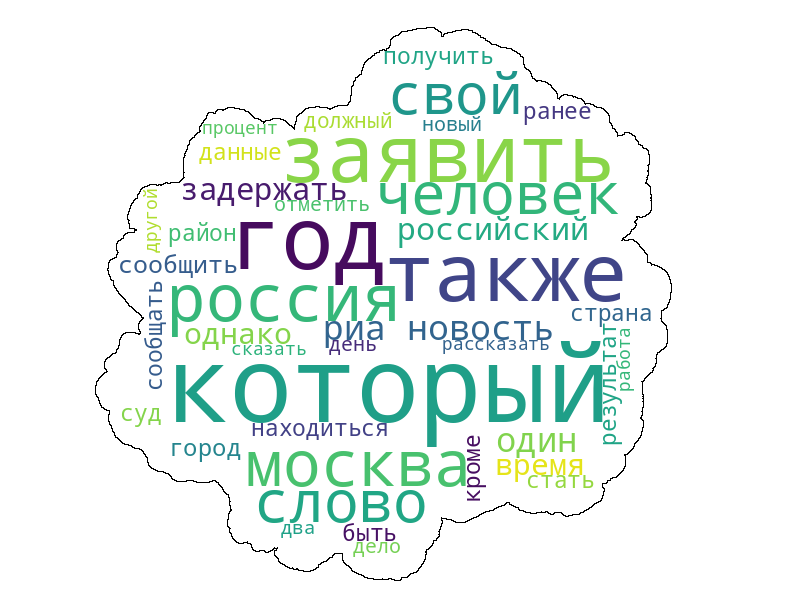

Спорт


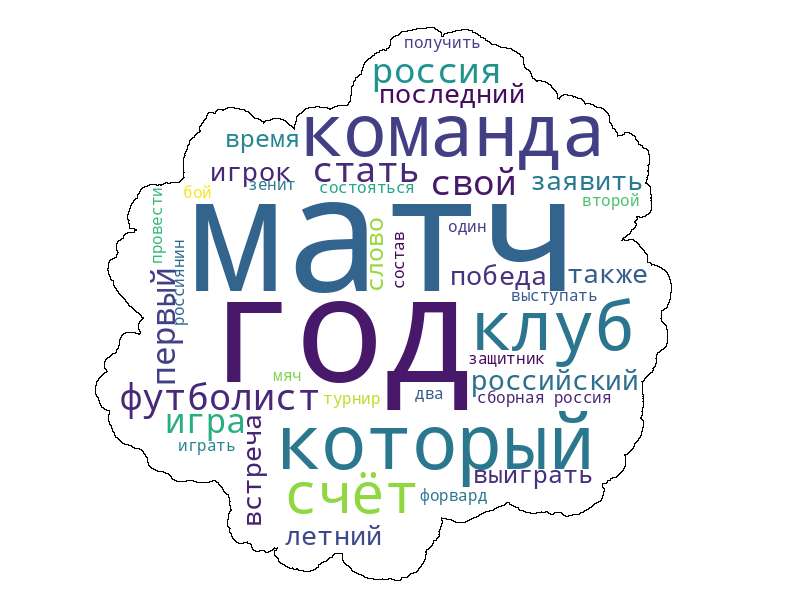

In [32]:
print('Россия')
img = Image.open("word-cloud_Россия.png")
img.show()
print('Спорт')
img = Image.open("word-cloud_Спорт.png")
img.show()

Выглядит адекватно, но не удалено стоп-слово "который")

## Выделение тем из текстов

Построим скрытое распределение Дирехле, т.е. LDA тематическую модель, оценим её работоспособность, выведя характерные слова для тем. 
Так как количество тем можно подбирать в первую очередь "на глаз", адекватность работы модели предлагается осуществить самостоятельно.

In [33]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # игорирование предупреждения модуля gensim
warnings.filterwarnings("ignore", category=FutureWarning) # игорирование предупреждения модуля pyLDAvis

In [34]:
import gensim.corpora as corpora
def make_corpus(text):
  # Словарь (id2word) - уникальный идентификатор для каждого слова word, word_id
  id2word = corpora.Dictionary(text)
  # Корпус (corpus) - количествл повторений для каждого слова word_id, word_frequency
  corpus = [id2word.doc2bow(t) for t in text]
  print(*tuple(tuple({'ID': id, 'Слово': id2word[id], 'Повторений': freq} for id, freq in cp) for cp in corpus[:1])[0], sep='\n')
  return id2word, corpus

Рассмотрим на примере лемматизированного текста

In [35]:
id2word_text, corpus_text = make_corpus(text_lemmatized)

{'ID': 0, 'Слово': 'reuters', 'Повторений': 1}
{'ID': 1, 'Слово': 'акция', 'Повторений': 1}
{'ID': 2, 'Слово': 'альтернативный', 'Повторений': 1}
{'ID': 3, 'Слово': 'бегство', 'Повторений': 1}
{'ID': 4, 'Слово': 'беспорядок', 'Повторений': 1}
{'ID': 5, 'Слово': 'ближний', 'Повторений': 1}
{'ID': 6, 'Слово': 'больший', 'Повторений': 1}
{'ID': 7, 'Слово': 'бумага', 'Повторений': 1}
{'ID': 8, 'Слово': 'ввп', 'Повторений': 1}
{'ID': 9, 'Слово': 'ведомость', 'Повторений': 1}
{'ID': 10, 'Слово': 'весь', 'Повторений': 1}
{'ID': 11, 'Слово': 'вложение', 'Повторений': 1}
{'ID': 12, 'Слово': 'восток', 'Повторений': 1}
{'ID': 13, 'Слово': 'восточный', 'Повторений': 1}
{'ID': 14, 'Слово': 'вывод', 'Повторений': 1}
{'ID': 15, 'Слово': 'выйти', 'Повторений': 1}
{'ID': 16, 'Слово': 'годовой', 'Повторений': 1}
{'ID': 17, 'Слово': 'грозить', 'Повторений': 1}
{'ID': 18, 'Слово': 'дать', 'Повторений': 1}
{'ID': 19, 'Слово': 'доллар', 'Повторений': 2}
{'ID': 20, 'Слово': 'европа', 'Повторений': 1}
{'ID': 

In [36]:
id2word_title, corpus_title = make_corpus(title_lemmatized)

{'ID': 0, 'Слово': 'доллар', 'Повторений': 1}
{'ID': 1, 'Слово': 'занеделя', 'Повторений': 1}
{'ID': 2, 'Слово': 'инвестиция', 'Повторений': 1}
{'ID': 3, 'Слово': 'миллиард', 'Повторений': 1}
{'ID': 4, 'Слово': 'потерять', 'Повторений': 1}
{'ID': 5, 'Слово': 'развивающийся', 'Повторений': 1}
{'ID': 6, 'Слово': 'страна', 'Повторений': 1}


In [37]:
id2word_fulltext, corpus_fulltext = make_corpus(fulltext_lemmatized)

{'ID': 0, 'Слово': 'reuters', 'Повторений': 1}
{'ID': 1, 'Слово': 'акция', 'Повторений': 1}
{'ID': 2, 'Слово': 'альтернативный', 'Повторений': 1}
{'ID': 3, 'Слово': 'бегство', 'Повторений': 1}
{'ID': 4, 'Слово': 'беспорядок', 'Повторений': 1}
{'ID': 5, 'Слово': 'ближний', 'Повторений': 1}
{'ID': 6, 'Слово': 'больший', 'Повторений': 1}
{'ID': 7, 'Слово': 'бумага', 'Повторений': 1}
{'ID': 8, 'Слово': 'ввп', 'Повторений': 1}
{'ID': 9, 'Слово': 'ведомость', 'Повторений': 1}
{'ID': 10, 'Слово': 'весь', 'Повторений': 1}
{'ID': 11, 'Слово': 'вложение', 'Повторений': 1}
{'ID': 12, 'Слово': 'восток', 'Повторений': 1}
{'ID': 13, 'Слово': 'восточный', 'Повторений': 1}
{'ID': 14, 'Слово': 'вывод', 'Повторений': 1}
{'ID': 15, 'Слово': 'выйти', 'Повторений': 1}
{'ID': 16, 'Слово': 'годовой', 'Повторений': 1}
{'ID': 17, 'Слово': 'грозить', 'Повторений': 1}
{'ID': 18, 'Слово': 'дать', 'Повторений': 1}
{'ID': 19, 'Слово': 'доллар', 'Повторений': 3}
{'ID': 20, 'Слово': 'европа', 'Повторений': 1}
{'ID': 

In [38]:
# Для обучения модели LDA нужно указать корпус (corpus), словарь (id2word) и количество тем (num_topics)
# Максимальное количество итераций по корпусу при выводе тематического распределения корпуса (iterations)

In [39]:
import gensim
def make_model(my_corpus, my_id2word, num_iter=5):
  # Модель LDA
  lda_model = gensim.models.ldamodel.LdaModel(corpus=my_corpus, id2word=my_id2word,
                                            num_topics=topic_cnt, iterations=num_iter) # итерация занимает, как правило, около 30 секунд
  return lda_model

In [40]:
lda_model_text = make_model(corpus_text,id2word_text)

In [41]:
lda_model_title = make_model(corpus_title,id2word_title)

In [42]:
lda_model_fulltext = make_model(corpus_fulltext,id2word_fulltext)

In [43]:
print(lda_model_text)

LdaModel<num_terms=38194, num_topics=18, decay=0.5, chunksize=2000>


## Анализ получившихся тем

По результатам предыдущего этапа у нас получилась приемлемая тематическая модель. Теперь нужно качественно определить, действительно ли она хороша:
* Все ли темы из датасета освещены в темах?
* Насколько сильно темы пересекаются друг с другом?
* Для каждой темы определим её название (1-2 слова)

In [44]:
from gensim.models import CoherenceModel

# Определяем качество модели
def evaluate_lda(lda_model, corpus, text, id2word):
  lda_perplexity = lda_model.log_perplexity(corpus) # сложность модели
  lda_coherence = CoherenceModel(model=lda_model, texts=text_lemmatized, dictionary=id2word, coherence='c_v') # согласованность тем
  lda_coherence = lda_coherence.get_coherence() # аккуратно, выполнение долгое
  print('Cложность модели:', lda_perplexity) # чем ниже, тем модель лучше
  print('Согласованность тем:', lda_coherence) # чем выше, тем модель лучше

In [45]:
evaluate_lda(lda_model_text, corpus_text, text_lemmatized, id2word_text)

Cложность модели: -10.864250312542554
Согласованность тем: 0.2634023646754402


In [46]:
evaluate_lda(lda_model_title, corpus_title, title_lemmatized, id2word_title)

Cложность модели: -13.01473340002262
Согласованность тем: nan


В модели по заголовкам мало информации

In [47]:
evaluate_lda(lda_model_fulltext, corpus_fulltext, fulltext_lemmatized, id2word_fulltext)

Cложность модели: -11.04291532688858
Согласованность тем: 0.26405177844251954


Полная модель лишь незначительно превосходит модель на основе текстов статей без заголовков

Визуализируем результаты тематической модели

In [48]:
#!pip install pyLDAvis

In [49]:
!pip install pyLDAvis==2.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97721 sha256=830bac72848e96b2d6544636b09b95d5c88e4741138bbcc8ccf0f9faca0fc33c
  Stored in directory: /root/.cache/pip/wheels/d9/93/d6/16c95da19c32f037fd75135ea152d0df37254c25cd1a8b4b6c
Successfully built pyLDAvis


In [50]:
import pyLDAvis
import pyLDAvis.gensim as gensimvis
pyLDAvis.enable_notebook()

# Визуализируем и посмотрим насколько сильно темы пересекаются друг с другом
lda_viz = gensimvis.prepare(lda_model_text, corpus_text, id2word_text)
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
11    -0.002975  0.003913       1        1  6.455382
14    -0.002785  0.005023       2        1  6.358270
7      0.002468  0.003041       3        1  6.110491
17    -0.003599  0.000316       4        1  6.037387
0      0.001993  0.001189       5        1  5.989955
8      0.004193  0.004195       6        1  5.803533
4      0.000978  0.001276       7        1  5.794491
1      0.008685 -0.000755       8        1  5.679838
16    -0.005361 -0.002832       9        1  5.538673
2      0.000757 -0.005834      10        1  5.516029
12    -0.005896  0.001847      11        1  5.491687
5     -0.000028  0.003591      12        1  5.487796
9      0.004422 -0.002570      13        1  5.365479
6     -0.000312  0.000122      14        1  5.352418
3      0.001418  0.000495      15        1  5.184721
15    -0.000107 -0.004542      16        1  4.856722
10    -0.001395 -0.005436      17        1  4.621060
13    -0.002458 -0.003038      18        1  4.356068, topic_info=           Term         Freq        Total Category  logprob  loglift
165         год  5871.000000  5871.000000  Default  30.0000  30.0000
67     сообщать  2048.000000  2048.000000  Default  29.0000  29.0000
594    компания  1481.000000  1481.000000  Default  28.0000  28.0000
32      который  4283.000000  4283.000000  Default  27.0000  27.0000
19       доллар  1116.000000  1116.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
411    получить    40.495448   925.359494  Topic18  -6.2091   0.0046
947  сообщаться    33.135640   671.569641  Topic18  -6.4097   0.1246
488      данные    37.041118   848.066781  Topic18  -6.2983   0.0027
77       страна    44.497443  1318.386020  Topic18  -6.1149  -0.2551
65         свой    48.229549  1614.720097  Topic18  -6.0344  -0.3773

[1355 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
13976      2  0.092399  abba
13976      5  0.092399  abba
13976      6  0.184798  abba
13976      8  0.092399  abba
13976     12  0.277196  abba
...      ...       ...   ...
8813      13  0.194802   янг
8813      16  0.194802   янг
7498       2  0.140561  ясир
7498       5  0.140561  ясир
7498      14  0.281122  ясир

[4414 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 15, 8, 18, 1, 9, 5, 2, 17, 3, 13, 6, 10, 7, 4, 16, 11, 14])

In [51]:
# Полнота освещения тем
# Количество тем в датасете 23
# Количество тем в модели 19

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
# Ключевые слова для каждой темы с весом (важностью)
print(*sorted(lda_model_text.print_topics(), key=lambda x: x[0]), sep='\n')

(0, '0.012*"год" + 0.010*"который" + 0.005*"россия" + 0.005*"свой" + 0.004*"сообщать" + 0.004*"также" + 0.004*"человек" + 0.004*"процент" + 0.004*"российский" + 0.003*"время"')
(1, '0.012*"который" + 0.010*"год" + 0.007*"россия" + 0.005*"компания" + 0.005*"время" + 0.005*"заявить" + 0.005*"сообщать" + 0.004*"процент" + 0.003*"также" + 0.003*"президент"')
(2, '0.011*"который" + 0.010*"год" + 0.006*"россия" + 0.004*"свой" + 0.004*"человек" + 0.004*"сообщать" + 0.004*"также" + 0.003*"процент" + 0.003*"доллар" + 0.003*"компания"')
(3, '0.011*"год" + 0.009*"который" + 0.006*"россия" + 0.005*"также" + 0.004*"процент" + 0.004*"время" + 0.003*"тысяча" + 0.003*"сообщать" + 0.003*"слово" + 0.003*"свой"')
(4, '0.013*"год" + 0.010*"который" + 0.005*"россия" + 0.005*"сообщать" + 0.004*"процент" + 0.004*"свой" + 0.004*"слово" + 0.003*"человек" + 0.003*"заявить" + 0.003*"также"')
(5, '0.017*"год" + 0.008*"который" + 0.004*"также" + 0.004*"процент" + 0.004*"сообщать" + 0.004*"заявить" + 0.004*"россия"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
# Это означает, что тему 2 можно описать словами: политика/Россия (Россия, президент заявить, российский и т.п.)
# При этом у слова "президент" вес (важность) один, а у слова "Россия" - другой и т. д.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
# Возможно для улучшения тематической модели стоит убрать английские слова
# и в стоп слова добавить: который, также, такой, твой, свой

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Модель классификации**

In [55]:
df_cut.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,title,text,full_description,topic,text_lemm,title_lemm,full_lemm
0,Развивающиеся страны потеряли 4 миллиарда долларов инвестиций за неделю,"Инвесторы на неделе с 26 января по 2 февраля резко сократили свои вложения в акции развивающихся рынков, сообщает Reuters. Чистый отток капитала из соответствующих фондов составил 4,1 миллиарда долларов. Одной из ключевых причин вывода средств стали беспорядки в Египте, грозящие усилением политической нестабильности в развивающихся странах. Значительная часть этих средств была переведена в ценные бумаги США, чему способствовала хорошая макроэкономическая статистика. В частности, вышли убедительные данные по росту ВВП в четвертом квартале (рост на 2,9 процента в годовом исчислении), а также...","Развивающиеся страны потеряли 4 миллиарда долларов инвестиций за неделю.Инвесторы на неделе с 26 января по 2 февраля резко сократили свои вложения в акции развивающихся рынков, сообщает Reuters. Чистый отток капитала из соответствующих фондов составил 4,1 миллиарда долларов. Одной из ключевых причин вывода средств стали беспорядки в Египте, грозящие усилением политической нестабильности в развивающихся странах. Значительная часть этих средств была переведена в ценные бумаги США, чему способствовала хорошая макроэкономическая статистика. В частности, вышли убедительные данные по росту ВВП в...",Экономика,"(инвестор, неделя, январь, февраль, резко, сократить, свой, вложение, акция, развивающийся, рынок, сообщать, reuters, чистый, отток, капитал, соответствующий, фонд, составить, миллиард, доллар, один, ключевой, причина, вывод, средство, стать, беспорядок, египет, грозить, усиление, политический, нестабильность, развивающийся, страна, значительный, часть, этот, средство, перевести, ценный, бумага, сша, что, способствовать, хороший, макроэкономический, статистика, частность, выйти, убедительный, дать, рост, ввп, четвёртый, квартал, рост, процент, годовой, исчисление, также, промышленный, прои...","(развивающийся, страна, потерять, миллиард, доллар, инвестиция, занеделя)","(развивающийся, страна, потерять, миллиард, доллар, инвестиция, занеделюинвестор, неделя, январь, февраль, резко, сократить, свой, вложение, акция, развивающийся, рынок, сообщать, reuters, чистый, отток, капитал, соответствующий, фонд, составить, миллиард, доллар, один, ключевой, причина, вывод, средство, стать, беспорядок, египет, грозить, усиление, политический, нестабильность, развивающийся, страна, значительный, часть, этот, средство, перевести, ценный, бумага, сша, что, способствовать, хороший, макроэкономический, статистика, частность, выйти, убедительный, дать, рост, ввп, четвёртый,..."
1,Брат и сестра погибли в Кировской области по пути на похороны матери,"В Кировской области брат и сестра, ехавшие на похороны матери, погибли в ДТП, сообщает в пятницу, 12 августа, портал Progorod43.ru. Авария произошла накануне утром на трассе в Омутнинском районе области. Находившийся за рулем автомобиля ВАЗ 69-летний мужчина не справился с управлением, из-за чего машина съехала в кювет и перевернулась. В результате ДТП погибли водитель и 59-летняя пассажирка. Отмечается, что они ехали на церемонию прощания с 91-летней матерью, проходившую в деревне Челка в Советском районе. Ранее в августе в Астрахани автобус, водитель которого потерял сознание во время е...","Брат и сестра погибли в Кировской области по пути на похороны матери.В Кировской области брат и сестра, ехавшие на похороны матери, погибли в ДТП, сообщает в пятницу, 12 августа, портал Progorod43.ru. Авария произошла накануне утром на трассе в Омутнинском районе области. Находившийся за рулем автомобиля ВАЗ 69-летний мужчина не справился с управлением, из-за чего машина съехала в кювет и перевернулась. В результате ДТП погибли водитель и 59-летняя пассажирка. Отмечается, что они ехали на церемонию прощания с 91-летней матерью, проходившую в деревне Челка в Советском районе. Ранее в авгус...",Россия,"(кировский, область, брат, сестра, ехать, похороны, мать, погибнуть, дтп, сообщать, п

Сделаем функцию преобразования текстовой информации

In [56]:
from nltk.stem import SnowballStemmer
def news_to_words(news_text):
    news_text = news_text.replace('ё','е')
    news_text = news_text.replace('Ё','Е')
    # 1. Удаляем все, кроме букв
    letters_only = re.sub("[^а-яА-Я]", " ", news_text) 
    # 2. Делаем все буквы строчными и создаем массив слов
    words = letters_only.lower().split()                             
    # 3. Удаляем незначащие слова
    meaningful_words = [w for w in words if not w in stop_words]
    # 4. Делаем стемминг
    snowball = SnowballStemmer(language='russian')
    stem_words = [snowball.stem(w) for w in meaningful_words]
    # 5. Формируем текст, объединяя слова через пробел
    return( " ".join(stem_words ))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Закодируем классы модели

In [57]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_cut['topic'])
df_cut['topic'] = le.transform(df_cut['topic'])
df_cut[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,title,text,full_description,topic,text_lemm,title_lemm,full_lemm
0,Развивающиеся страны потеряли 4 миллиарда долларов инвестиций за неделю,"Инвесторы на неделе с 26 января по 2 февраля резко сократили свои вложения в акции развивающихся рынков, сообщает Reuters. Чистый отток капитала из соответствующих фондов составил 4,1 миллиарда долларов. Одной из ключевых причин вывода средств стали беспорядки в Египте, грозящие усилением политической нестабильности в развивающихся странах. Значительная часть этих средств была переведена в ценные бумаги США, чему способствовала хорошая макроэкономическая статистика. В частности, вышли убедительные данные по росту ВВП в четвертом квартале (рост на 2,9 процента в годовом исчислении), а также...","Развивающиеся страны потеряли 4 миллиарда долларов инвестиций за неделю.Инвесторы на неделе с 26 января по 2 февраля резко сократили свои вложения в акции развивающихся рынков, сообщает Reuters. Чистый отток капитала из соответствующих фондов составил 4,1 миллиарда долларов. Одной из ключевых причин вывода средств стали беспорядки в Египте, грозящие усилением политической нестабильности в развивающихся странах. Значительная часть этих средств была переведена в ценные бумаги США, чему способствовала хорошая макроэкономическая статистика. В частности, вышли убедительные данные по росту ВВП в...",17,"(инвестор, неделя, январь, февраль, резко, сократить, свой, вложение, акция, развивающийся, рынок, сообщать, reuters, чистый, отток, капитал, соответствующий, фонд, составить, миллиард, доллар, один, ключевой, причина, вывод, средство, стать, беспорядок, египет, грозить, усиление, политический, нестабильность, развивающийся, страна, значительный, часть, этот, средство, перевести, ценный, бумага, сша, что, способствовать, хороший, макроэкономический, статистика, частность, выйти, убедительный, дать, рост, ввп, четвёртый, квартал, рост, процент, годовой, исчисление, также, промышленный, прои...","(развивающийся, страна, потерять, миллиард, доллар, инвестиция, занеделя)","(развивающийся, страна, потерять, миллиард, доллар, инвестиция, занеделюинвестор, неделя, январь, февраль, резко, сократить, свой, вложение, акция, развивающийся, рынок, сообщать, reuters, чистый, отток, капитал, соответствующий, фонд, составить, миллиард, доллар, один, ключевой, причина, вывод, средство, стать, беспорядок, египет, грозить, усиление, политический, нестабильность, развивающийся, страна, значительный, часть, этот, средство, перевести, ценный, бумага, сша, что, способствовать, хороший, макроэкономический, статистика, частность, выйти, убедительный, дать, рост, ввп, четвёртый,..."
1,Брат и сестра погибли в Кировской области по пути на похороны матери,"В Кировской области брат и сестра, ехавшие на похороны матери, погибли в ДТП, сообщает в пятницу, 12 августа, портал Progorod43.ru. Авария произошла накануне утром на трассе в Омутнинском районе области. Находившийся за рулем автомобиля ВАЗ 69-летний мужчина не справился с управлением, из-за чего машина съехала в кювет и перевернулась. В результате ДТП погибли водитель и 59-летняя пассажирка. Отмечается, что они ехали на церемонию прощания с 91-летней матерью, проходившую в деревне Челка в Советском районе. Ранее в августе в Астрахани автобус, водитель которого потерял сознание во время е...","Брат и сестра погибли в Кировской области по пути на похороны матери.В Кировской области брат и сестра, ехавшие на похороны матери, погибли в ДТП, сообщает в пятницу, 12 августа, портал Progorod43.ru. Авария произошла накануне утром на трассе в Омутнинском районе области. Находившийся за рулем автомобиля ВАЗ 69-летний мужчина не справился с управлением, из-за чего машина съехала в кювет и перевернулась. В результате ДТП погибли водитель и 59-летняя пассажирка. Отмечается, что они ехали на церемонию прощания с 91-летней матерью, проходившую в деревне Челка в Советском районе. Ранее в авгус...",13,"(кировский, область, брат, сестра, ехать, похороны, мать, погибнуть, дтп, сообщать, пятница, авг

Применим функцию к нашему обрезанному датасету

In [58]:
bu = df_cut.copy
df_cut['txt'] = df_cut['text'].apply(lambda s: news_to_words(s))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
df_cut.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,title,text,full_description,topic,text_lemm,title_lemm,full_lemm,txt
0,Развивающиеся страны потеряли 4 миллиарда долларов инвестиций за неделю,"Инвесторы на неделе с 26 января по 2 февраля резко сократили свои вложения в акции развивающихся рынков, сообщает Reuters. Чистый отток капитала из соответствующих фондов составил 4,1 миллиарда долларов. Одной из ключевых причин вывода средств стали беспорядки в Египте, грозящие усилением политической нестабильности в развивающихся странах. Значительная часть этих средств была переведена в ценные бумаги США, чему способствовала хорошая макроэкономическая статистика. В частности, вышли убедительные данные по росту ВВП в четвертом квартале (рост на 2,9 процента в годовом исчислении), а также...","Развивающиеся страны потеряли 4 миллиарда долларов инвестиций за неделю.Инвесторы на неделе с 26 января по 2 февраля резко сократили свои вложения в акции развивающихся рынков, сообщает Reuters. Чистый отток капитала из соответствующих фондов составил 4,1 миллиарда долларов. Одной из ключевых причин вывода средств стали беспорядки в Египте, грозящие усилением политической нестабильности в развивающихся странах. Значительная часть этих средств была переведена в ценные бумаги США, чему способствовала хорошая макроэкономическая статистика. В частности, вышли убедительные данные по росту ВВП в...",17,"(инвестор, неделя, январь, февраль, резко, сократить, свой, вложение, акция, развивающийся, рынок, сообщать, reuters, чистый, отток, капитал, соответствующий, фонд, составить, миллиард, доллар, один, ключевой, причина, вывод, средство, стать, беспорядок, египет, грозить, усиление, политический, нестабильность, развивающийся, страна, значительный, часть, этот, средство, перевести, ценный, бумага, сша, что, способствовать, хороший, макроэкономический, статистика, частность, выйти, убедительный, дать, рост, ввп, четвёртый, квартал, рост, процент, годовой, исчисление, также, промышленный, прои...","(развивающийся, страна, потерять, миллиард, доллар, инвестиция, занеделя)","(развивающийся, страна, потерять, миллиард, доллар, инвестиция, занеделюинвестор, неделя, январь, февраль, резко, сократить, свой, вложение, акция, развивающийся, рынок, сообщать, reuters, чистый, отток, капитал, соответствующий, фонд, составить, миллиард, доллар, один, ключевой, причина, вывод, средство, стать, беспорядок, египет, грозить, усиление, политический, нестабильность, развивающийся, страна, значительный, часть, этот, средство, перевести, ценный, бумага, сша, что, способствовать, хороший, макроэкономический, статистика, частность, выйти, убедительный, дать, рост, ввп, четвёртый,...",инвестор недел январ феврал резк сократ сво вложен акц развива рынк сообща чист отток капита соответств фонд состав миллиард доллар одн ключев причин вывод средств стал беспорядк египт грозя усилен политическ нестабильн развива стран значительн част эт средств перевед цен бумаг сша чем способствова хорош макроэкономическ статистик частност вышл убедительн дан рост ввп четверт квартал рост процент годов исчислен такж промышлен производств январ наибольш урон понесл фонд кит инд отток средств котор превыс миллион доллар напрот восточн европ росс столкнул проблем бегств капитал значительн мен...
1,Брат и сестра погибли в Кировской области по пути на похороны матери,"В Кировской области брат и сестра, ехавшие на похороны матери, погибли в ДТП, сообщает в пятницу, 12 августа, портал Progorod43.ru. Авария произошла накануне утром на трассе в Омутнинском районе области. Находившийся за рулем автомобиля ВАЗ 69-летний мужчина не справился с управлением, из-за чего машина съехала в кювет и перевернулась. В результате ДТП погибли водитель и 59-летняя пассажирка. Отмечается, что они ехали на церемонию прощания с 91-летней матерью, проходившую в деревне Челка в Советском районе. Ранее в августе в Астрахани автобус, водитель которого потерял сознание во время е...","Брат и сестра погибли в Кировской области по пути на похороны матери.В Кировской области брат и 

Построим мешок слов

In [60]:
from sklearn import feature_extraction
from sklearn import model_selection

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
bow = feature_extraction.text.CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 50000, binary = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
bagOfWords = bow.fit_transform(df_cut['txt'])
#vocabulary=bow.get_feature_names()
vocabulary=bow.get_feature_names_out()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
print(vocabulary)

['ааг' 'аар' 'ааронович' ... 'ящер' 'ящериц' 'ящик']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Поделим на обучающую и тестовую выборку

In [64]:
bagOfWordsTrain, bagOfWordsTest, yTrain, yTest = model_selection.train_test_split(bagOfWords, df_cut['topic'], test_size=0.2, random_state=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Создадим машину опорных векторов svm.LinearSVC с параметрами C=1, fit_intercept=False.

Натренируем ее на обучающей выборке и с помощью метода .score(x,y) вычислим процент правильных предсказаний для тестовой выборки.

In [65]:
from sklearn import svm
SVM = svm.LinearSVC(C=0.1, fit_intercept=False)
SVM.fit(bagOfWordsTrain, yTrain)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LinearSVC(C=0.1, fit_intercept=False)

In [66]:
SVM.score(bagOfWordsTest,yTest)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.7237026647966339

Оценим метрики precision и recall (точность и полнота)

In [67]:
from sklearn.metrics import classification_report

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
y_pred = SVM.predict(bagOfWordsTest)
print(classification_report(yTest, y_pred))

              precision    recall  f1-score   support

           2       0.67      0.25      0.36         8
           3       0.79      0.67      0.72        57
           4       0.57      0.65      0.60        20
           5       0.47      0.39      0.42        18
           6       0.54      0.61      0.57        33
           7       0.00      0.00      0.00         2
           9       0.86      0.82      0.84        60
          10       0.66      0.75      0.70       145
          11       0.82      0.76      0.79        54
          12       1.00      0.22      0.36         9
          13       0.70      0.74      0.72       167
          14       0.00      0.00      0.00         9
          15       0.98      0.98      0.98        45
          16       1.00      0.71      0.83         7
          17       0.76      0.78      0.77        79

    accuracy                           0.72       713
   macro avg       0.65      0.56      0.58       713
weighted avg       0.72   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Видим, что не все классы попали в нашу тестовую выборку. А также есть ряд классов (7 и 14, с которыми модель вообще не научилась работать), вместе с тем, примеров из этих классов довольно мало. Построим матрицу путаницы.

In [69]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(yTest, y_pred)
cf_matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[  2,   0,   1,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,
          0,   4],
       [  0,  38,   0,   0,   2,   0,   1,   8,   0,   0,   7,   0,   0,
          0,   1],
       [  0,   0,  13,   0,   0,   0,   0,   2,   0,   0,   1,   0,   0,
          0,   4],
       [  0,   0,   1,   7,   2,   0,   1,   6,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   1,  20,   0,   3,   2,   1,   0,   3,   0,   0,
          0,   3],
       [  0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   1,   0,   1,   0,  49,   3,   1,   0,   5,   0,   0,
          0,   0],
       [  0,   3,   0,   3,   5,   0,   1, 109,   1,   0,  20,   0,   0,
          0,   3],
       [  0,   1,   1,   2,   3,   0,   0,   3,  41,   0,   1,   0,   0,
          0,   2],
       [  0,   0,   0,   0,   1,   0,   1,   3,   0,   2,   1,   0,   0,
          0,   1],
       [  0,   4,   4,   1,   2,   0,   1,  25,   3,   0, 124,   2,   0,
       

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

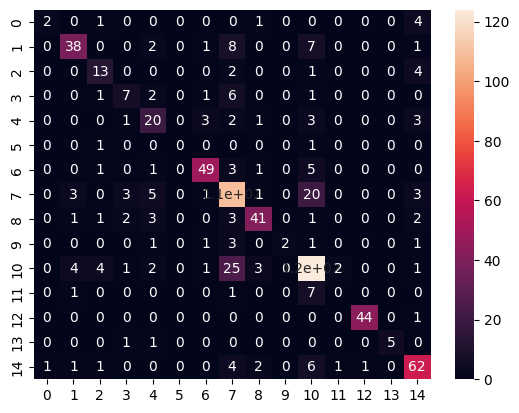

In [70]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

Тем не менее, у модели довольно высокая точность на тестовой выборке по метрике Accuracy. Значит, она хорошо работает с популярными классами. Проанализируем произвольный текст.

In [71]:
my_txt = ['Роджер Федерер обыграл Рафаэля Надаля в финале теннисного турнира в Австралии. Счет матча 6:2, 6:0. Федерер\
играл намного лучше, брал гейм за геймом. Он поднял кубок над головой, проведя потрясающий матч.', 'Посольство России готово к любым \
решениям Москвы после захвата польскими властями здания российской школы. Об этом заявил ТАСС посол РФ в Польше Сергей Андреев, \
отвечая на вопрос о возможности разрыва дипломатических отношений.']
txt_transform = bow.transform(my_txt)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
class_id = SVM.predict(txt_transform)
print(class_id)

[15 13]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
labels = list(le.inverse_transform(class_id))
print(labels)

['Спорт', 'Россия']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Модель распознала предложенные тексты, как "Спорт" и "Россия", что может быть адекватно.

## Классификатор на трансформерах

In [74]:
pip install transformers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Будем строить модель на базе ruBERT

In [75]:
import torch
import transformers
import torch.nn as nn
import random
from transformers import AutoModel, AutoTokenizer, BertTokenizer, BertForSequenceClassification
from transformers import TrainingArguments, Trainer
from sklearn.metrics import f1_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(
/usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/__init__.py:6: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  ) < LooseVersion("1.15"):


In [76]:
#задание всех seed
def seed_all(seed_value):
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value)
        torch.backends.cudnn.benchmark = True
        torch.backends.cudnn.deterministic = False
seed_all(42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Загружаем модель и указываем количество классов для обучения

In [208]:
model = BertForSequenceClassification.from_pretrained('DeepPavlov/rubert-base-cased-sentence', num_labels=19).to("cuda")
tokenizer = BertTokenizer.from_pretrained('DeepPavlov/rubert-base-cased-sentence')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased-sentence and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Разделим датасет на таргеты и входы

In [153]:
dataset = df_cut[['full_description','topic']]
dataset.rename(columns={"full_description": "text", "topic": "label"}, inplace=True)
dataset.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,label
0,"Развивающиеся страны потеряли 4 миллиарда долларов инвестиций за неделю.Инвесторы на неделе с 26 января по 2 февраля резко сократили свои вложения в акции развивающихся рынков, сообщает Reuters. Чистый отток капитала из соответствующих фондов составил 4,1 миллиарда долларов. Одной из ключевых причин вывода средств стали беспорядки в Египте, грозящие усилением политической нестабильности в развивающихся странах. Значительная часть этих средств была переведена в ценные бумаги США, чему способствовала хорошая макроэкономическая статистика. В частности, вышли убедительные данные по росту ВВП в...",17
1,"Брат и сестра погибли в Кировской области по пути на похороны матери.В Кировской области брат и сестра, ехавшие на похороны матери, погибли в ДТП, сообщает в пятницу, 12 августа, портал Progorod43.ru. Авария произошла накануне утром на трассе в Омутнинском районе области. Находившийся за рулем автомобиля ВАЗ 69-летний мужчина не справился с управлением, из-за чего машина съехала в кювет и перевернулась. В результате ДТП погибли водитель и 59-летняя пассажирка. Отмечается, что они ехали на церемонию прощания с 91-летней матерью, проходившую в деревне Челка в Советском районе. Ранее в авгус...",13
2,"Защитник ""Милана"" будет рекламировать грузинское вино.Защитник сборной Грузии и итальянского ""Милана"" Каха Каладзе решил рекламировать и продавать грузинские вина в знаменитом миланском ресторане ""Джанино"". В июне футболист вместе со своими друзьями выкупил и отреставрировал это заведение и теперь собирается добавить в меню свои национальные вина. ""В нашем ресторане бывают известные лица Италии: спортсмены, бизнесмены, журналисты, актеры, модели. Пока мы продаем итальянские вина. Скоро в ресторане появятся грузинские вина, мы будем их рекламировать и продавать"", - рассказал Каладзе. Как от...",15
3,"Шведский археолог просит снять с аукционов ножи викингов.Археолог Кристиан Рюнебю (Christian Runeby) просит правительство Швеции вернуть в страну оружие викингов, которое оказалось в распоряжении аукциона Faganarms в штате Мичиган, сообщает АР. Рюнебю обнаружил на сайте этого аукциона, который специализируется на старинном оружии, выставленные мечи, ножи, браслеты и конскую сбрую. Большинство артефактов датируется примерно 800 годом нашей эры. Общая стоимость коллекции из сотни предметов оценивается администрацией Faganarms в 26 тысяч долларов. На сайте указано, что все это было найдено ...",10
4,"Аббаса просят отложить парламентские выборы.В понедельник палестинский избирком объявил, что не успеет подготовиться к проведению парламентских выборов, намеченных на 17 июля. Как сообщает агентство Associated Press, в связи с этим председателя палестинской автономии Махмуда Аббаса попросили назначить специальным указом новую дату выборов. Комиссия утверждает, что ей потребуется не менее двух месяцев с момента принятия закона о выборах, чтобы подготовиться к их проведению. Однако принятие выборного законодательства откладывается из-за разногласий между Аббасом и парламентом, которые никак ...",10


Настраиваем предобученную модель

In [150]:
# Define the model repo
model_name = "DeepPavlov/rubert-base-cased" 

# Download pytorch model
model = AutoModel.from_pretrained(model_name, num_labels=19)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Transform input tokens 
inputs = tokenizer("Hello world!", return_tensors="pt")

# Model apply
outputs = model(**inputs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPr

In [156]:
data = dataset.to_dict('records')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [161]:
my_dataset = {}
train, test = np.split(dataset, [int(.8*len(df_cut))])
my_dataset['train'] = train.to_dict('records')
my_dataset['test'] = test.to_dict('records')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [168]:
tokens_train = tokenizer.batch_encode_plus(
    train.text.values.tolist(),
    max_length = 512,
    padding = 'max_length',
    truncation = True
)
tokens_test = tokenizer.batch_encode_plus(
    test.text.values.tolist(),
    max_length = 512,
    padding = 'max_length',
    truncation = True
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [174]:
class Data(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
        
    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor([self.labels[idx]])
        return item
    def __len__(self):
        return len(self.labels)
    
train_dataset = Data(tokens_train, train.label.values)
test_dataset = Data(tokens_test, test.label.values)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [175]:
train_dataset[10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'input_ids': tensor([   101,  26074,    880,  72184,  41269,  11747,   1469,  18941,    132,
          50735,  63813,  32105,    845,  37669,  64818,  43152,  41269,  11747,
            130,  98847,   2241,  12480,  72732,  63754,  35880,    130,   6309,
            612,  27532,  24572,   6297,  23110,  12138,  34560,    128,   4721,
          20550,  33251,  12430,    132,  24207,  47788,   1469,  32170,  32105,
            845,  11807,   9488,  13198,  12739,  64586,  30069,  72690,  14372,
           9833,    116,  72690,  14372,   9833,    132,  24529,  13917,    128,
          46779,   6899,  15206,    128,  15169,  36493,  29507,    132,  15597,
          29507,    851,  41269,  11747,   4745,  19751,  55893,    612,  75449,
            128, 108879,    845,  36356,  17444,  16626,  29507,    248,    199,
            851,  41269,  11747,  40115,  20474,   6722,    132,    781,   3815,
           3629,   3299,    128,  16606,  34770,    128,   1997,  46678,    845,
          28173

In [176]:
from sklearn.metrics import f1_score
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds)
    return {'F1': f1}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [187]:
training_args = TrainingArguments(
    output_dir = './results', #Выходной каталог
    num_train_epochs = 3, #Кол-во эпох для обучения
    per_device_train_batch_size = 8, #Размер пакета для каждого устройства во время обучения
    per_device_eval_batch_size = 8, #Размер пакета для каждого устройства во время валидации
    weight_decay =0.01, #Понижение весов
    logging_dir = './logs', #Каталог для хранения журналов
    load_best_model_at_end = True, #Загружать ли лучшую модель после обучения
    learning_rate = 1e-5, #Скорость обучения
    evaluation_strategy ='epoch', #Валидация после каждой эпохи (можно сделать после конкретного кол-ва шагов)
    logging_strategy = 'epoch', #Логирование после каждой эпохи
    save_strategy = 'epoch', #Сохранение после каждой эпохи
    save_total_limit = 1,
    #label_names = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],
    seed=21)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [188]:
trainer = Trainer(model=model,
                  tokenizer = tokenizer,
                  args = training_args,
                  train_dataset = train_dataset,
                  eval_dataset = train_dataset,
                  compute_metrics = compute_metrics)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#С trainer происходит ошибка

In [186]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 1>:1                                                                              │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/trainer.py:1664 in train                    │
│                                                                                                  │
│   1661 │   │   inner_training_loop = find_executable_batch_size(                                 │
│   1662 │   │   │   self._inner_training_loop, self._train_batch_size, args.auto_find_batch_size  │
│   1663 │   │   )                                                                                 │
│ ❱ 1664 │   │   return inner_training_loop(                                                       │
│   1665 │   │   │   args=args,                                                                    │
│   1666 │   │   │   resume_from_checkpoint=resume_from_checkpoint,                                │
│   1667 │   │   │   trial=trial,                                                                  │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/trainer.py:1940 in _inner_training_loop     │
│                                                                                                  │
│   1937 │   │   │   │   │   with model.no_sync():                                                 │
│   1938 │   │   │   │   │   │   tr_loss_step = self.training_step(model, inputs)                  │
│   1939 │   │   │   │   else:                                                                     │
│ ❱ 1940 │   │   │   │   │   tr_loss_step = self.training_step(model, inputs)                      │
│   1941 │   │   │   │                                                                             │
│   1942 │   │   │   │   if (                                                                      │
│   1943 │   │   │   │   │   args.logging_nan_inf_filter                                           │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/trainer.py:2735 in training_step            │
│                                                                                                  │
│   2732 │   │   │   return loss_mb.reduce_mean().detach().to(self.args.device)                    │
│   2733 │   │                                                                                     │
│   2734 │   │   with self.compute_loss_context_manager():                                         │
│ ❱ 2735 │   │   │   loss = self.compute_loss(model, inputs)                                       │
│   2736 │   │                                                                                     │
│   2737 │   │   if self.args.n_gpu > 1:                                                           │
│   2738 │   │   │   loss = loss.mean()  # mean() to average on multi-gpu parallel training        │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/trainer.py:2780 in compute_loss             │
│                                                                                                  │
│   2777 │   │   │   │   loss = self.label_smoother(outputs, labels)                               │
│   2778 │   │   else:                                                                             │
│   2779 │   │   │   if isinstance(outputs, dict) and "loss" not in outputs:                       │
│ ❱ 2780 │   │   │   │   raise ValueError(                                                         │
│   2781 │   │   │   │   │   "The model did not return a loss

Попробуем обучиться на основе эмбеддингов

In [259]:
from sklearn.preprocessing import normalize

xtrain = []
for i in range(len(ytrain)):
  ls = np.array(list(tokens_train[i].ids))
  xtrain.append(ls)
xtrain = np.array(xtrain)
print(xtrain.shape)
xtrain = normalize(xtrain)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2851, 512)


In [245]:
xtrain

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[  101, 38959, 95154, ...,     0,     0,     0],
       [  101, 17139,   851, ...,     0,     0,     0],
       [  101, 61036,   108, ...,     0,     0,     0],
       ...,
       [  101, 12189, 24530, ...,     0,     0,     0],
       [  101,   781, 50287, ...,     0,     0,     0],
       [  101, 63547,  1916, ...,     0,     0,     0]])

In [260]:
xtest = []
for i in range(len(ytest)):
  ls = np.array(list(tokens_test[i].ids))
  xtest.append(ls)
xtest = np.array(xtest)
xtest = normalize(xtest)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [248]:
ytrain = np.array(ytrain)
ytest = np.array(ytest)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [234]:
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [261]:
clf = LogisticRegression(random_state=0).fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [263]:
print(classification_report(clf.predict(xtest), ytest))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           3       0.02      0.05      0.03        21
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          10       0.30      0.17      0.22       247
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         0
          13       0.56      0.23      0.32       373
          14       0.00      0.00      0.00         0
          15       0.04      0.33      0.07         6
          16       0.00      0.00      0.00         0
          17       0.12      0.15      0.13        61

    accuracy                           0.19       713
   macro avg       0.07      0.06      0.05       713
weighted avg       0.41   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [280]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

mymodel = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(18, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [281]:
mymodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [282]:
from tensorflow.keras import utils
train_Y_categorical = utils.to_categorical(ytrain)
test_Y_categorical = utils.to_categorical(ytest)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [284]:
history = mymodel.fit(xtrain, train_Y_categorical, epochs=100, validation_split=0.15)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


76/76 [==============================] - 1s 8ms/step - loss: 1.3305 - accuracy: 0.5960 - val_loss: 2.8295 - val_accuracy: 0.1939
Epoch 2/100
76/76 [==============================] - 1s 7ms/step - loss: 1.1914 - accuracy: 0.6438 - val_loss: 2.9487 - val_accuracy: 0.1939
Epoch 3/100
76/76 [==============================] - 0s 6ms/step - loss: 1.0637 - accuracy: 0.6946 - val_loss: 3.0666 - val_accuracy: 0.1752
Epoch 4/100
76/76 [==============================] - 0s 6ms/step - loss: 0.9281 - accuracy: 0.7470 - val_loss: 3.1760 - val_accuracy: 0.1659
Epoch 5/100
76/76 [==============================] - 0s 6ms/step - loss: 0.8044 - accuracy: 0.7825 - val_loss: 3.3298 - val_accuracy: 0.1612
Epoch 6/100
76/76 [==============================] - 0s 6ms/step - loss: 0.6880 - accuracy: 0.8324 - val_loss: 3.5681 - val_accuracy: 0.1752
Epoch 7/100
76/76 [==============================] - 0s 5ms/step - loss: 0.5862 - accuracy: 0.8659 - val_loss: 3.6890 - val_accuracy: 0.1589
Epoch 8/100
76/76 [======

Эмбеддинги не сработали, модель прекрасно распознает тестовые данные, но не работает на валидации.